In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('KC_data.csv')

In [4]:
df

year  housing_units  med_home_val  population  med_income  Unnamed: 5  \
0   2000         742237        225000     1737081       53200         NaN   
1   2001         750607        235000     1755690       54887         NaN   
2   2002         758977        249000     1774300       55082         NaN   
3   2003         767347        265000     1779300       56881         NaN   
4   2004         775717        284950     1788300       55114         NaN   
5   2005         784087        332000     1808300       58370         NaN   
6   2006         792457        378500     1835300       63489         NaN   
7   2007         800827        397000     1861300       67010         NaN   
8   2008         809197        394900     1881212       70193         NaN   
9   2009         817572        365000     1922645       67246         NaN   
10  2010         851962        356000     1931249       68065         NaN   
11  2011         857417        347000     1942600       70567         NaN   
12  2012         862777        319000     1957000       71175         NaN   
13  2013         873796        350000     1981900       71811         NaN   
14  2014         885357        398000     2017250       73035         NaN   
15  2015         899415        425000     2052800       75302         NaN   
16  2016         917384        474000     2105100       78800         NaN   
17  2017         934552        541000     2153700       83571         NaN   
18  2018         952569        622000     2190200       95009         NaN   

    Unnamed: 6  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
5          NaN  
6          NaN  
7          NaN  
8          NaN  
9          NaN  
10         NaN  
11         NaN  
12         NaN  
13         NaN  
14         NaN  
15         NaN  
16         NaN  
17         NaN  
18         NaN

In [5]:
df.drop(columns = ['Unnamed: 5', 'Unnamed: 6'], axis = 1, inplace = True)

In [6]:
df.set_index('year', inplace = True)

In [7]:
df = df.astype(int)

In [8]:
df.dtypes

housing_units    int64
med_home_val     int64
population       int64
med_income       int64
dtype: object

In [9]:
df

housing_units  med_home_val  population  med_income
year                                                     
2000         742237        225000     1737081       53200
2001         750607        235000     1755690       54887
2002         758977        249000     1774300       55082
2003         767347        265000     1779300       56881
2004         775717        284950     1788300       55114
2005         784087        332000     1808300       58370
2006         792457        378500     1835300       63489
2007         800827        397000     1861300       67010
2008         809197        394900     1881212       70193
2009         817572        365000     1922645       67246
2010         851962        356000     1931249       68065
2011         857417        347000     1942600       70567
2012         862777        319000     1957000       71175
2013         873796        350000     1981900       71811
2014         885357        398000     2017250       73035
2015         899415        425000     2052800       75302
2016         917384        474000     2105100       78800
2017         934552        541000     2153700       83571
2018         952569        622000     2190200       95009

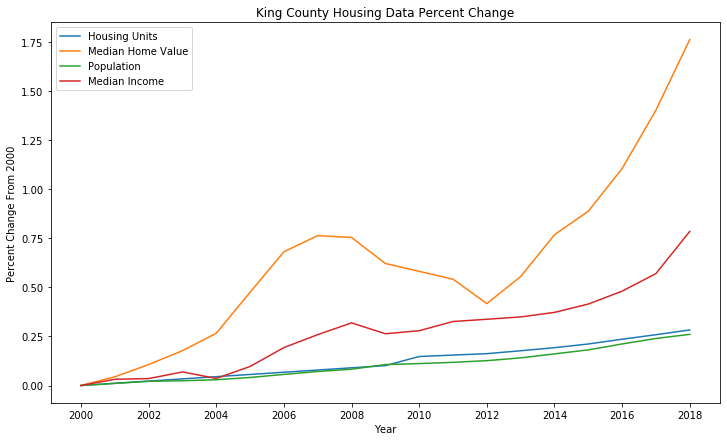

In [10]:
plt.figure(figsize = (12, 7))
for c in df.columns:
    labels = ['Housing Units', 'Median Home Value', 'Population', 'Median Income']
    plt.plot(df.index, df[c] / df[c].iloc[0] - 1)
plt.legend(labels)
plt.xticks(range(2000, 2019, 2))
plt.xlabel("Year")
plt.ylabel("Percent Change From 2000")
plt.title ('King County Housing Data Percent Change')
plt.savefig('kc_percent_change', bbox_inches='tight');
#code credit: Richard

In [11]:
plt.figure(figsize = (12, 7))
plt.plot(df['med_home_val'])
plt.xlabel("Year")
plt.ylabel("Home Value")
plt.title ('King County Median Home Value')
plt.xticks(range(2000, 2019, 2))
plt.savefig('kc_med_home_val');

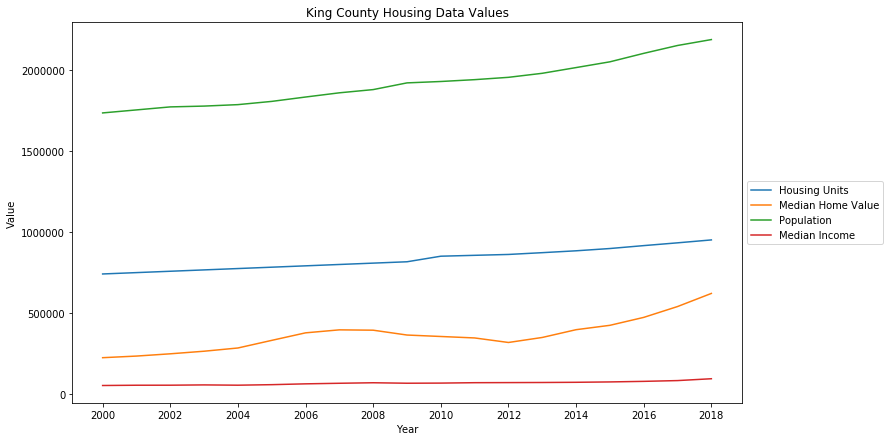

In [12]:
labels = ['Housing Units', 'Median Home Value', 'Population', 'Median Income']
plt.figure(figsize = (12, 7))
plt.plot(df, data = df[['housing_units', 'med_home_val', 'population', 'med_income']])
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(range(2000, 2019, 2))
plt.xlabel("Year")
plt.ylabel("Value")
plt.title ('King County Housing Data Values')
plt.savefig('kc_all_vals', bbox_inches='tight')

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
X = df.drop('med_home_val', 1)
y = df['med_home_val']

In [15]:
ss = StandardScaler()

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 43)

In [71]:
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [72]:
model = LinearRegression()

In [73]:
model.fit(X_train_ss, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
print(model.score(X_train_ss, y_train))
print(model.score(X_test_ss, y_test))

0.9523150731802605
0.8314058454596401


In [75]:
y_pred = model.predict(X_train_ss)

In [76]:
plt.figure(figsize = (12, 7))
plt.scatter(y_pred, y_train, s=5, color='blue')
plt.xlabel("Estimated Value")
plt.ylabel("Actual Value")
plt.title ('Actual Values Vs Estimated Values')
plt.savefig('accuracy', bbox_inches='tight')

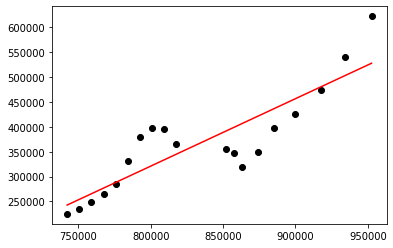

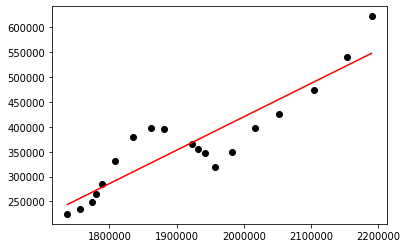

In [77]:
lr = LinearRegression()
for c in X.columns:
    lr.fit(X[[c]], y)
    plt.scatter(X[c], y, color = 'k')
    plt.plot(X[c], lr.predict(X[[c]]), color = 'r')
    plt.show()

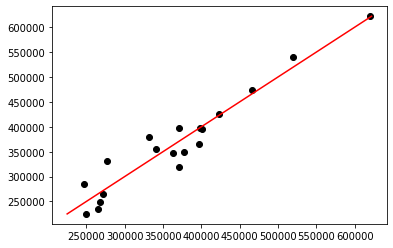

In [78]:
lr.fit(X, y)
plt.scatter(lr.predict(X), y, color = 'k')
plt.plot(np.linspace(y.min(), y.max()), np.linspace(y.min(), y.max()), color = 'r')


In [79]:
n_estimators = [6, 20, 60, 100, 200]
rf_model = RandomForestRegressor()


rf_params = {'n_estimators': n_estimators}

In [80]:
rf_gridsearch = GridSearchCV(RandomForestRegressor(),
                              rf_params,
                              cv=5,
                              verbose=1)

In [81]:
rf_gridsearch.fit(X_train_ss, y_train);

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.9s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [82]:
print(rf_gridsearch.best_score_)
print('Best Parameters: ',  rf_gridsearch.best_params_)
best_rf_params = rf_gridsearch.best_params_

0.6194188721465751
Best Parameters:  {'n_estimators': 60}


In [83]:
rf_model = rf_gridsearch.best_estimator_
rf_model.score(X_train_ss, y_train)

0.9842780768594996

In [84]:
rf_model.score(X_test_ss, y_test)

0.7042599745004591

In [87]:
y_pred_rf = rf_model.predict(X_train_ss)

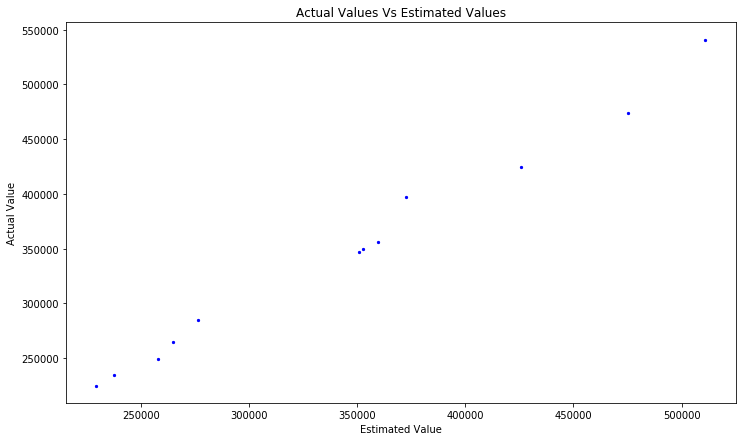

In [88]:
plt.figure(figsize = (12, 7))
plt.scatter(y_pred_rf, y_train, s=5, color='blue')
plt.xlabel("Estimated Value")
plt.ylabel("Actual Value")
plt.title ('Actual Values Vs Estimated Values')
plt.savefig('accuracy', bbox_inches='tight')

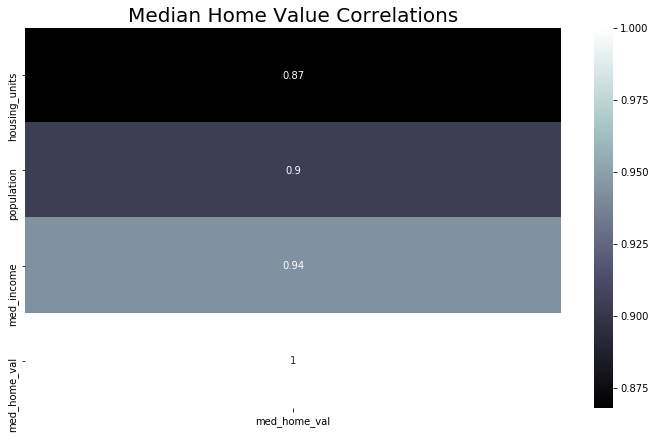

In [34]:
plt.figure(figsize = (12, 7))
sns.heatmap(df.corr()[['med_home_val']].sort_values('med_home_val'), annot=True, cmap='bone');
plt.title('Median Home Value Correlations', fontsize=20);
plt.savefig('corr', bbox_inches='tight')